Exploration on the data using matplotlib and seaborn

Different Classifier models to predict the quality of wine -> Random Forest Classifier, Stochastic Gradient Descent Classifier, Support Vector Classifier

Cross Validaiton Evaluation technique to optimize model performance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
%matplotlib inline

In [2]:
#Loading the dataset
wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

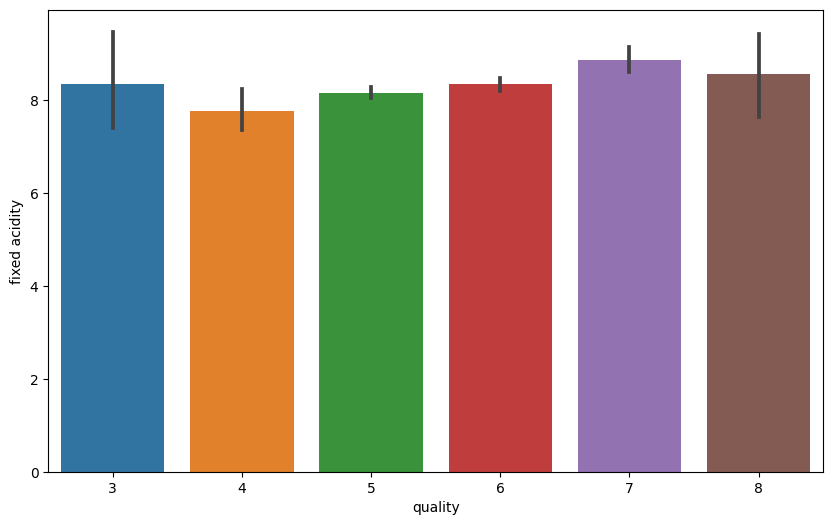

In [5]:
# We see that fixed acidity doesn't give any specification to classify the quality
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y='fixed acidity', data=wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

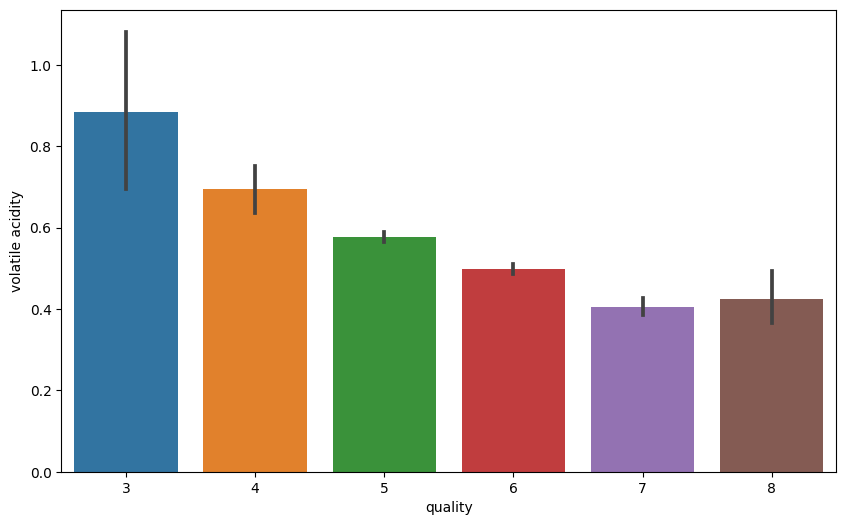

In [6]:
# We see that it's quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="volatile acidity", data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

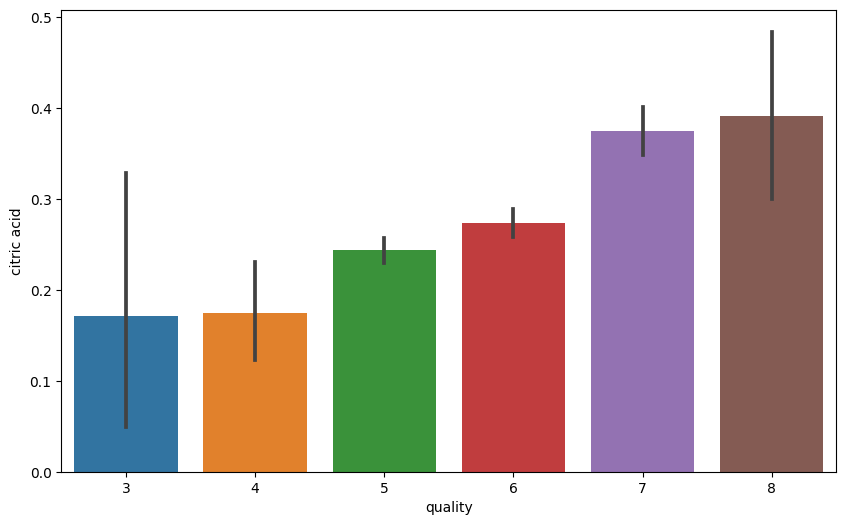

In [7]:
# Citric acid go higher as we go higher in the quality of wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="citric acid", data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

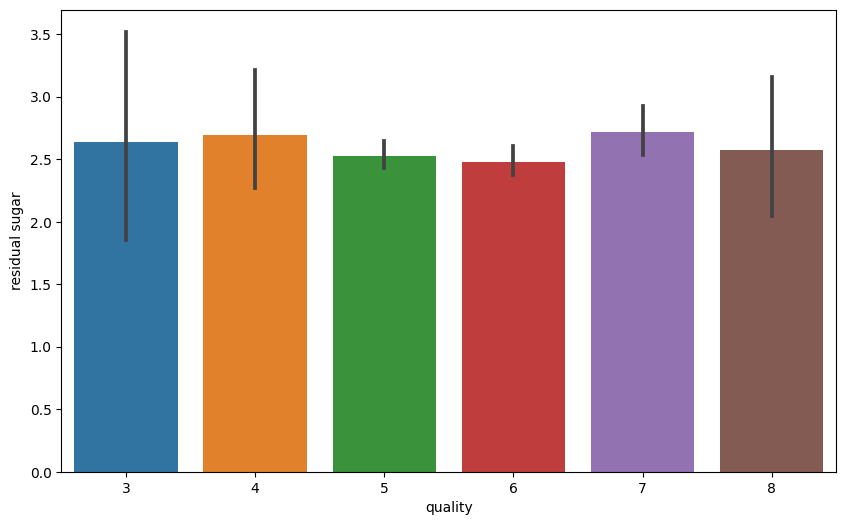

In [8]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=wine)

<Axes: xlabel='quality', ylabel='chlorides'>

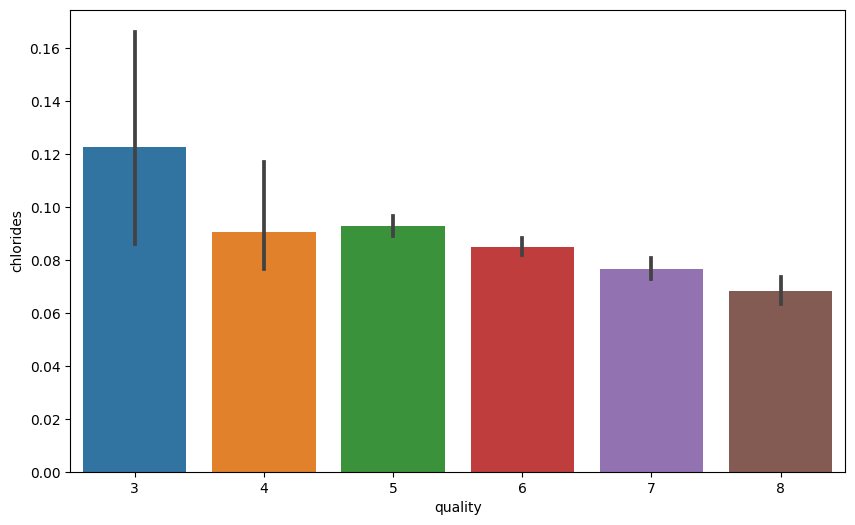

In [9]:
# Chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="chlorides", data=wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

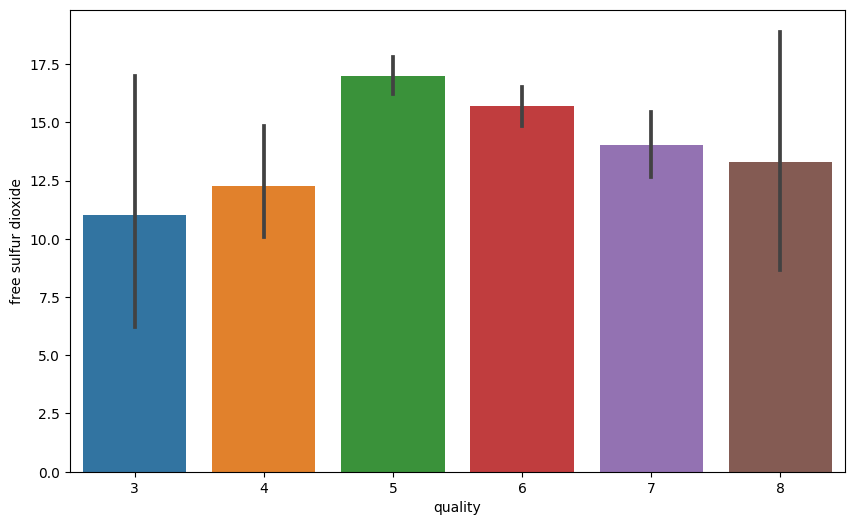

In [10]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="free sulfur dioxide", data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

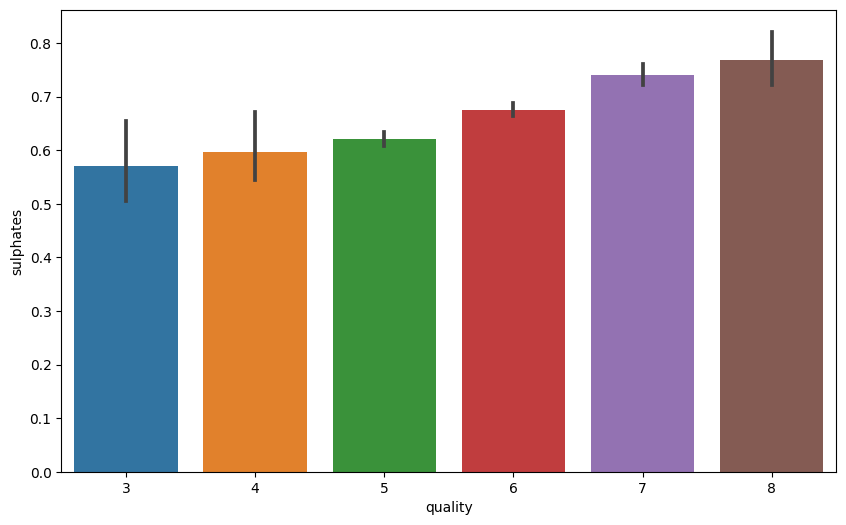

In [11]:
# Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="sulphates", data=wine)

<Axes: xlabel='quality', ylabel='alcohol'>

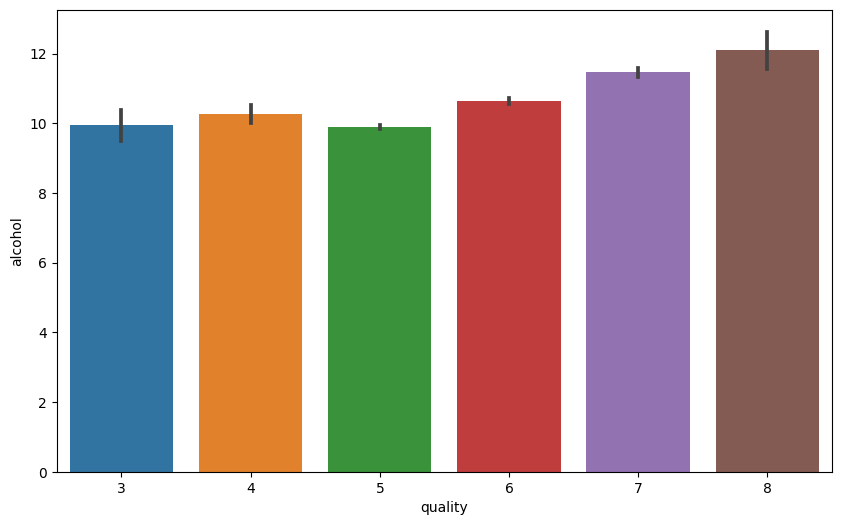

In [12]:
# Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="alcohol", data=wine)